# Pandas
Pandas (Python Data Analysis Library) is an extremely popular module which you'll find at the top of a huge proportion of data science notebooks. Like numpy, it's also popular enough to deserve its own import idiom...

In [2]:
import pandas as pd
import numpy as np

To get a quick idea of the scope of pandas take a look at the autocomplete for pd.

In [ ]:
pd.

The fundamental objects in pandas are the `Series` and the `DataFrame`. These build on the idea of a numpy `ndarray`, but they add the idea of an index and they include a rich set of methods which we can use to manipulate data.

## Series
The pandas `Series` object is basically a one dimensional _indexed_ array. Schematically, they look like

| Index | Value |
|-------|-------|
| 0     |  0.12 |
| 1     |  0.24 |
| 2     |  0.36 |
| 3     |  0.48 |

There are two columns: an index and a value. Most of the time the index values are distinct (this isn't a firm requirement though!) but the index doesn't have to be integers. Any hashable type will do

In [3]:
s1 = pd.Series({'one' : 1.0, 'two': 2.0, 'three': 3.0})
s1

one      1.0
two      2.0
three    3.0
dtype: float64

One particularly common option is to use a timestamp as the index (don't worry about the syntax here, we'll come back to time-series later)...

In [4]:
dti = pd.date_range('2020-06-03', periods=3, freq='H')
pd.Series(['first', 'second', 'third'], index=dti)

2020-06-03 00:00:00     first
2020-06-03 01:00:00    second
2020-06-03 02:00:00     third
Freq: H, dtype: object

The next thing to notice is that the values all share the same type (e.g. `dtype: float64` for `s1`, `object` for `dti`). `pandas` will make `Series` of almost any type as long as all the rows share the same type, but it will always try to pick the most efficient implementation. For numerical values, it'll use `numpy.ndarrays`, but if it can't infer a specific type, it will fall back to a generic `object` type. It really pays (in speed) to keep an eye on the `dtype` and use a `numpy.ndarray` type where possible. For categorical values there is a special `Categorical` `dtype` which can help when interfacing with `sklearn`.

### Making `Series`

You'll probably find that you want to deal with `DataFrames` more often than `Series`, but lots of operations in `panadas` return Series (or want them as an argument in some operation) so it's good to know how to build them.

Like `ndarray`'s, you can initialize a `Series` from a sequence, by default it'll get an ascending integer index

In [5]:
sf = pd.Series([1.0, 2.0, 3.0, 4.0, 5.0])
sf

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [6]:
si = pd.Series(range(5))
si

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [7]:
si.dtype

dtype('int64')

So far, this looks a lot like a numpy array (or even just a list), but we can switch the indexing to suit our needs, by explicitly passing the `index=` arguement

In [8]:
sm = pd.Series([1., 2., 3., 4., 5.], index=['one', 'two', 'three', 'four', 'five'])
sm

one      1.0
two      2.0
three    3.0
four     4.0
five     5.0
dtype: float64

### Indexing and Slicing

square bracket notation will select by index value, this is convenient, but see `.loc` and `.iloc` later for more flexibility.

In [9]:
sm['three']

3.0

Now the series is starting to look more like a dictionary, in fact, that's another good way to construct `Series`

In [10]:
sn = pd.Series({'one': 1, 'three': 3, 'two': 2, 'four': 4, 'five': 5})
sn

one      1
three    3
two      2
four     4
five     5
dtype: int64

When you look closely though, a Series has a few tricks that a dictionary doesn't...

In [12]:
sn['three':'four']

three    3
two      2
four     4
dtype: int64

N.B. label based indexes are _inclusive_ of the `stop` value. This is different from most other indexes you'll see in python, and can cause a little confusion. If you use numbers to do the slice, you'll get the familiar python behaviour

In [13]:
sn[1:3]

three    3
two      2
dtype: int64

Series have a `keys()` method, but it returns an index object

In [14]:
sn.keys()

Index(['one', 'three', 'two', 'four', 'five'], dtype='object')

Element by element statements evaluate to Booleans

In [15]:
sn > 2

one      False
three     True
two      False
four      True
five      True
dtype: bool

and if you remember the material on numpy fancy indexing, this can be very useful

In [17]:
sn[sn > 2]

three    3
four     4
five     5
dtype: int64

You can combine these conditions in more complicated expressions, but be careful that `&` isn't interpretred as a bitwise operation

In [18]:
sn[(sn > 2) & (sn < 5)]

three    3
four     4
dtype: int64

There are also some extra indexing methods available to you: `.loc`, `.iloc`, `.ix`. These let you be much more explicit about exactly what you want to return. At a very basic level, they can help you avoid label confusion...

In [19]:
sa = pd.Series(data=['apple', 'banana', 'orange', 'pineapple'], index=[3, 2, 1, 7])

sa

3        apple
2       banana
1       orange
7    pineapple
dtype: object

Suppose we want the value in the 4th row...

In [20]:
sa[3]

'apple'

Nope, `3` was interperted as a label. There's an ambiguity because of the type of the index. Fortunately `pandas` gives us a pair of functions to avoid that problem

  * `.iloc[]`: Purely integer-location based indexing.
  * `loc[]` : Purely label based indexing.

In [22]:
sa.loc[3]

'apple'

In [23]:
sa.iloc[3]

'pineapple'

And `.iloc` will also work with slices

In [24]:
sa.iloc[:3:2]

3     apple
1    orange
dtype: object

Logical and fancy indexing work here too

In [25]:
sa.iloc[[2, 1, 3]]

1       orange
2       banana
7    pineapple
dtype: object

Logical indexing works with these methods as well...

In [26]:
sn.loc[sn>3]

four    4
five    5
dtype: int64

_**Exercise**: Create a series with the letters of the alphabet as values (try using `enumerate`). Use the .`sort_index` method to reverse the `Series` and slice the result to pick out the values between `t` and `k` (inclusive)_

In [33]:
alphabet = pd.Series({letter: i for (i, letter) in enumerate('abcdefghijklmnopqrstuvwxyz')})
alphabet.sort_index(ascending=False)['t':'l']

t    19
s    18
r    17
q    16
p    15
o    14
n    13
m    12
l    11
dtype: int64

## DataFrames

Most of the time you will be using `DataFrames` rather than `Series` (though the result of many `DataFrame` operations is a `Series`), but at a first pass it is OK to think of `DataFrames` as a bunch of `Series` stuck together with a common index. 


| Index | Value1 | Value2 | 
|-------|--------|--------|
|   0   |  0.12  |   'a'  |
|   1   |  0.24  |   'b'  |
|   2   |  0.36  |   'c'  |
|   3   |  0.48  |   'd'  |

The rules discussed above for the index stay the same but notice that we can now have different types in the various columns

In [34]:
d1 = pd.DataFrame({'floats': sm, 'ints': sn})
d1

,floats,ints
five,5.0,5
four,4.0,4
one,1.0,1
three,3.0,3
two,2.0,2


In [35]:
d1.dtypes

floats    float64
ints        int64
dtype: object

### DataFrame Attributes

We've already seen some of the attributes of the DataFrame (column etc.) but there are quite a few available, take a look at `index`, `columns`, `shape`, `dtypes`

In [36]:
d1.index

Index(['five', 'four', 'one', 'three', 'two'], dtype='object')

In [37]:
d1.columns

Index(['floats', 'ints'], dtype='object')

In [38]:
d1.shape

(5, 2)

In [39]:
d1.dtypes

floats    float64
ints        int64
dtype: object

There are also some useful utility functions for getting oriented with the contents of the dataframe

In [40]:
d1.describe()

,floats,ints
count,5.000000,5.000000
mean,3.000000,3.000000
std,1.581139,1.581139
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


(If you pass `include=all` to describe, it will also try to tell you what it can about non-numerical values)

In [41]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, five to two
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   floats  5 non-null      float64
 1   ints    5 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 120.0+ bytes


In [42]:
d1.head(n=2)

,floats,ints
five,5.0,5
four,4.0,4


### Indexing

When indexing a dataframe, the default is to give you the column (you can also use the syntax `d1.ints`)

In [43]:
d1['ints']

five     5
four     4
one      1
three    3
two      2
Name: ints, dtype: int64

If you are looking for the row, then try `.loc` with the row index value

In [44]:
d1.loc['one']

floats    1.0
ints      1.0
Name: one, dtype: float64

In fact, you probably want to lean towards `.loc` when you want to subset rows and/or columns. It is much more flexible and helps pandas resolve some potential ambiguities about what you want to select. Here is a column selection...

In [48]:
d1.loc['four':, ['ints', 'floats']]

,ints,floats
four,4,4.0
one,1,1.0
three,3,3.0
two,2,2.0


(The square brackets around 'ints' here tell pandas I want a `DataFrame` to be returned, rather than a `Series`)

In [49]:
d1.iloc[:2]

,floats,ints
five,5.0,5
four,4.0,4


In [50]:
# `.iloc will interprete both row and column specifiers as numerical positions
d1.iloc[:2, 1]

five    5
four    4
Name: ints, dtype: int64

Logical/fancy indexing works with `.loc` and `.iloc` as well, but remember the parentheses or `&` will be interpreted as a bitwise operator.

In [66]:
d1.loc[(d1['ints'] > 2 and d1['floats']) < 4, ['ints']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [52]:
d1.loc[d1.ints.isin((1, 4))]

,floats,ints
four,4.0,4
one,1.0,1


Wherever possible, `pandas` (like `numpy`) will try to return a view on the same data rather than a copy, but because the indexing possibilities in `pandas` are much greater, the specific rules are more subtle, suffice to say, `.loc` and `.iloc` will generally help resolve the ambiguity and if you really need to break the link between two dataframes you can use the `.copy()` method.

In [53]:
d1a = d1
d1a is d1

True

In [54]:
d1b = d1.copy()
d1b is d1

False

### Manipulating DataFrames

`DataFrames` are mutable; we can change the values in rows and columns and we can add/remove columns in place. `pandas` will usually operate in place, but some modifications (e.g. changing column dtype) require implicit data copies.

In [55]:
d1.iloc[1] = (3.0, 3)
d1

,floats,ints
five,5.0,5
four,3.0,3
one,1.0,1
three,3.0,3
two,2.0,2


Add a new column

In [56]:
d1['ratio'] = d1['ints'] / (2 * d1['floats'])
d1

,floats,ints,ratio
five,5.0,5,0.5
four,3.0,3,0.5
one,1.0,1,0.5
three,3.0,3,0.5
two,2.0,2,0.5


"Patching up" dataframes by modifying individual cells or groups of cells can be a little bit tricky. The basic reason is that a lot of the operations you would like to use to address the cell will return a copy of the dataframe but in general you want to modify the original.

In [58]:
d1['floats']['five'] = 5.1

/tmp/ipykernel_164/3754205575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['floats']['five'] = 5.1


The heart of this issue is described in the warning you'll see given above, but if you only need to change a single (scalar) value you can use `pd.DataFrame.at`

In [59]:
d1.at['five', 'floats'] = 5.0

For more general cases you can use `pd.DataFrame.loc`, (N.B. Avoid chained indexing ([][])

In [60]:
d1.loc[:, 'floats'] += 0.1
d1

,floats,ints,ratio
five,5.1,5,0.5
four,3.1,3,0.5
one,1.1,1,0.5
three,3.1,3,0.5
two,2.1,2,0.5


`pandas` also has facilities like `fillna` or `replace` to fill in multiple missing values using various strategies, we'll look at those later.

## DataFrame Methods

There are *lots* of methods for operating on DataFrames, have a look at the tab completion and explore the documentation for them. In particular, take a look at the help for `describe`, `head` and `tail`. These are great for orienting yourself with a new dataset

We won't have time to dive into all of the methods but we'll sample a few, then you should explore the documentation for others. Some of the most often used are

* `min`, `max`
* `mean`, `mode`, `median`
* `max`, `min`, `idxmax`, `idxmin`
* `any`, `all`
* `astype`
* `dropna`
* `sort_index`, `sort_values`
* `plot`

Generally these will return another `DataFrame` with the results you are looking for, but you can also pass the `inplace=True` keyword argument which will modify the `DataFrame` in place and save some memory.

In [61]:
d1.min()

floats    1.1
ints      1.0
ratio     0.5
dtype: float64

In [62]:
(d1 > 3).any()

floats     True
ints       True
ratio     False
dtype: bool

You can coerce values to different type

In [63]:
d1['floats'].astype(int)

five     5
four     3
one      1
three    3
two      2
Name: floats, dtype: int64

And sort values (or indices)

In [64]:
d1.sort_values('floats')

,floats,ints,ratio
one,1.1,1,0.5
two,2.1,2,0.5
four,3.1,3,0.5
three,3.1,3,0.5
five,5.1,5,0.5


_**Exercise**: Calculate the mean value of the floats column and use it to calculate how far each float is from the mean_

In [74]:
(d1['floats'] - d1['floats'].mean()).abs()

five     2.2
four     0.2
one      1.8
three    0.2
two      0.8
Name: floats, dtype: float64

The `dropna` method can come in handy sometimes. In general, pandas is very good at [handling missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html), but in some other modules will choke when they encounter a `np.NaN`

In [78]:
d1.at['three', 'floats'] = np.NaN
d1

,floats,ints,ratio
five,5.1,5,0.5
four,3.1,3,0.5
one,1.1,1,0.5
three,NaN,3,0.5
two,2.1,2,0.5


Operating directly on the numpy array...

In [76]:
d1['floats'].values.mean()

nan

Operating through pandas...

In [79]:
d1['floats'].mean()

2.8499999999999996

In [80]:
d1['floats'].dropna().values.mean()

2.8499999999999996

There are also convenience methods like `.fillna` for forward or backward filling missing values etc.

## Working with External Data

Data comes in many forms from simple csv/json files, real-time APIs, structured binary files and many others. Try `pd.read_<TAB>` to see some of the `pandas` ingestion options. `read_csv` is the main workhorse for data sets which will fit on a single machine. It is way more flexible than it's name suggests (S3 buckets, https, compressed files, ...) and many of the arguments to `read_csv` will have equivalents for the other functions, so we'll start by looking at it.
    
We need a CSV to work with. The city of Vancouver has an [open data catalog](https://vancouver.ca/your-government/open-data-catalogue.aspx), which has CSV for some of the datasets. There's a dataset which lists all of the [community gardens and food trees](https://opendata.vancouver.ca/explore/dataset/community-gardens-and-food-trees/information/) maintained by the city. A copy of it is available in this directory called `CommunityGardensAndFoodTrees.csv`

In [81]:
gardenDF = pd.read_csv(
    "https://opendata.vancouver.ca/explore/dataset/community-gardens-and-food-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B",
    delimiter=';'
)
gardenDF.shape

(168, 20)

In [82]:
gardenDF.describe(include='all', datetime_is_numeric=True)

,MAPID,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
count,168,156,168,159,68,159,157,159,162.000000,65,7,56,1,167,119,81,60,166,167,167
unique,168,33,166,144,4,104,9,152,NaN,27,7,44,1,5,90,69,55,22,165,165
top,FA004,2011,HFBC Housing Foundation,2690,W,6th,Av,"453 W 12th Av, Vancouver, BC",NaN,5,inc by 3 plots in 2016,Apple,Earth Tub composter,Private,Shifting Growth,foodsecurity@cnh.bc.ca,http://pinestreetgardens.org/,Mount Pleasant,"{""coordinates"": [-123.1139357, 49.2613159], ""t...","49.2613159,-123.1139357"
freq,1,15,3,3,34,7,69,2,NaN,7,1,9,1,77,7,4,3,24,2,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.580247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.977477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So there are 168 rows, with 20 columns, here are the fist few rows

In [84]:
gardenDF.head()

,MAPID,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
0,FA004,2007,1755 West 14th - Private apartment building ga...,1755,W,14th,Av,"1755 W 14th Av, Vancouver, BC",NaN,NaN,NaN,NaN,NaN,Private,Apartment residents,NaN,NaN,Fairview,"{""coordinates"": [-123.1448703, 49.2590496], ""t...","49.2590496,-123.1448703"
1,FA008,NaN,Arbutus Village Park,4202,NaN,Valley,Drive,"4202 Valley Drive, Vancouver, BC",0.0,9,NaN,Crabapple,NaN,Park Board,NaN,NaN,NaN,Arbutus Ridge,"{""coordinates"": [-123.1549951, 49.2507172], ""t...","49.2507172,-123.1549951"
2,FA010,NaN,Barclay Heritage Square,1433,NaN,Barclay,St,"1433 Barclay St, Vancouver, BC",0.0,2,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,West End,"{""coordinates"": [-123.13284501, 49.28738755], ...","49.28738755,-123.13284501"
3,FA018,2011,Cartier Park,390,E,36th,Av,"390 E 36th Av, Vancouver, BC",0.0,6,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Riley Park,"{""coordinates"": [-123.0975115, 49.2376052], ""t...","49.2376052,-123.0975115"
4,FA021,2013,Cedar Cottage Neighourhood House Edible Garden,4065,NaN,Victoria,Drive,"4065 Victoria Drive, Vancouver, BC",12.0,NaN,NaN,NaN,NaN,Private,Cedar Cottage Neighbourhood House,NaN,NaN,Kensington-Cedar Cottage,"{""coordinates"": [-123.0651476, 49.2488871], ""t...","49.2488871,-123.0651476"


So we can tell things like the gardens were created (`YEAR_CREATED`), and where the are (`LATITUDE`, `LONGITUDE`), and who's responsible for them (`STEWARD_OR_MANAGING_ORGANIZATION`). 

Now it is time to clean the data. This is a hugely important step and will generally eat a lot of your time, but it is worth doing right. Having mistakes in your data can undermine everything you subsequently try to infer from it.

First let's look at the index, the default is to index by integer, but we could have picked any column instead. It looks like the first column is unique (`MAPID`) and so let's use that (chosing the index right can make your life much easier when adding data or combining multiple DataFrames). The `inplace=True` argument means modify the existing dataframe rather than returning a modified copy

In [85]:
gardenDF.set_index('MAPID', inplace=True)

One useful trick when cleaning data is to look at the unique values in a column. You'll often catch coding mistakes or values being used as placeholders this way, e.g.

In [87]:
gardenDF['YEAR_CREATED'].unique()

array(['2007', nan, '2011', '2013', '2010', '1993', '2006', '2014',
       '1995', '2012', '2009', '2008', '1996', '2015', '1988', '2003',
       '1985', '1999', '2016', '2017', '2018', '2019', '2020', '1978',
       '2022', '1942', '1986', 'pre 2000', '1990', '2002', 'pre-1970',
       'Pre-2010', '1992', '2021'], dtype=object)

Value counts can also be useful to spot outliers

In [89]:
gardenDF['Geo Local Area'].value_counts()

Mount Pleasant              24
Hastings-Sunrise            16
Kensington-Cedar Cottage    15
Kitsilano                   14
Renfrew-Collingwood         11
Strathcona                  10
Grandview-Woodland          10
Fairview                     9
Killarney                    7
Marpole                      7
Riley Park                   7
West End                     7
Sunset                       5
West Point Grey              4
Kerrisdale                   3
Dunbar-Southlands            3
Victoria-Fraserview          3
Oakridge                     3
Arbutus Ridge                2
Downtown                     2
South Cambie                 2
Shaughnessy                  2
Name: Geo Local Area, dtype: int64

For the `YEAR_CREATED`, `Pre-2010`, `pre-1970` and `pre 2000` are kind of usless (and inconsistent!) so let's toss them

In [92]:
for badLabel in ['Pre-2010', 'pre-1970', 'pre 2000']:
    gardenDF = gardenDF.loc[gardenDF['YEAR_CREATED'] != badLabel]

gardenDF['YEAR_CREATED'].unique()

array(['2007', nan, '2011', '2013', '2010', '1993', '2006', '2014',
       '1995', '2012', '2009', '2008', '1996', '2015', '1988', '2003',
       '1985', '1999', '2016', '2017', '2018', '2019', '2020', '1978',
       '2022', '1942', '1986', '1990', '2002', '1992', '2021'],
      dtype=object)

There's still an `np.NaN`, and the years are strings (numbers would be better, or even dates). We can take a closer look at the rows which are missing their `YEAR_CREATED` using isnull

In [93]:
gardenDF.loc[gardenDF['YEAR_CREATED'].isnull()]

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
MAPID,,,,,,,,,,,,,,,,,,,
FA008,NaN,Arbutus Village Park,4202,NaN,Valley,Drive,"4202 Valley Drive, Vancouver, BC",0.0,9,NaN,Crabapple,NaN,Park Board,NaN,NaN,NaN,Arbutus Ridge,"{""coordinates"": [-123.1549951, 49.2507172], ""t...","49.2507172,-123.1549951"
FA010,NaN,Barclay Heritage Square,1433,NaN,Barclay,St,"1433 Barclay St, Vancouver, BC",0.0,2,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,West End,"{""coordinates"": [-123.13284501, 49.28738755], ...","49.28738755,-123.13284501"
FA022,NaN,Champlain Heights Park,3351,NaN,Maquinna,Drive,"3351 Maquinna Drive, Vancouver, BC",0.0,1,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Killarney,"{""coordinates"": [-123.0326603, 49.2164913], ""t...","49.2164913,-123.0326603"
FA148,NaN,Westmount Park,4651,W,2nd,Av,"4651 W 2nd Av, Vancouver, BC",0.0,2,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,West Point Grey,"{""coordinates"": [-123.2144218, 49.2718445], ""t...","49.2718445,-123.2144218"
FA176,NaN,John Hendry (Trout Lake) Park,3300,NaN,Victoria,Drive,"3300 Victoria Drive, Vancouver, BC",4.0,NaN,NaN,NaN,NaN,Park Board,NaN,NaN,https://cedarcottagefoodnetwork.com/projects-e...,Kensington-Cedar Cottage,"{""coordinates"": [-123.06367871, 49.255098], ""t...","49.255098,-123.06367871"
FA017,NaN,Carnarvon Park,2995,W,19th,Av,"2995 W 19th Av, Vancouver, BC",0.0,15,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Arbutus Ridge,"{""coordinates"": [-123.171486, 49.2565789], ""ty...","49.2565789,-123.171486"
FA024,NaN,Charles Park,3400,NaN,Charles,St,"3400 Charles St, Vancouver, BC",0.0,1,NaN,Crabapple,NaN,Park Board,NaN,NaN,NaN,Hastings-Sunrise,"{""coordinates"": [-123.0308947, 49.2732079], ""t...","49.2732079,-123.0308947"
FA046,NaN,Delamont Park,2091,W,7th,Av,"2091 W 7th Av, Vancouver, BC",0.0,8,NaN,"Cherry, Asian pear, plum, hazelnut",NaN,Park Board,NaN,NaN,NaN,Kitsilano,"{""coordinates"": [-123.152619, 49.2658197], ""ty...","49.2658197,-123.152619"
FA055,NaN,Everett Crowley Park,8200,NaN,Kerr,St,"8200 Kerr St, Vancouver, BC",0.0,2,NaN,"Cherry, pear",NaN,Park Board,NaN,NaN,NaN,Killarney,"{""coordinates"": [-123.0380764, 49.2111116], ""t...","49.2111116,-123.0380764"


Pandas has some facilities for [dealing with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html) as well as some helpful default behaviours. Additionally, the `.isna` and `.notna` methods can help you explicitly deal with missing values during operations, e.g.

In [94]:
missingDF = pd.DataFrame(
    np.random.randn(4, 3),
    index = ['one', 'two', 'three', 'four'],
    columns = ['a', 'b', 'c']
)
missingDF['d'] = list(np.random.randn(2)) + [np.nan] + [np.random.randn()]
missingDF

,a,b,c,d
one,1.724743,-1.636603,1.701103,1.161161
two,0.398679,1.654663,-0.661988,-0.119093
three,-0.407866,-1.584049,0.078967,NaN
four,-0.261323,0.516619,-1.998521,-0.117124


_**Exercise**:In some cases you might want to patch up missing data by combining one DataFrame with another, or by interpolating from nearby values_

  * _Use `.fillna` to fill with the value from the row above and/or below_
  * _Fill with the mean of the other column values_
  * _Fill with the mean of the other row values (`NotImplemented`, can `.T` help?)_

In [99]:
missingDF.fillna(method='ffill')

,a,b,c,d
one,1.724743,-1.636603,1.701103,1.161161
two,0.398679,1.654663,-0.661988,-0.119093
three,-0.407866,-1.584049,0.078967,-0.119093
four,-0.261323,0.516619,-1.998521,-0.117124


In [100]:
missingDF.fillna(missingDF.mean())

,a,b,c,d
one,1.724743,-1.636603,1.701103,1.161161
two,0.398679,1.654663,-0.661988,-0.119093
three,-0.407866,-1.584049,0.078967,0.308315
four,-0.261323,0.516619,-1.998521,-0.117124


In [102]:
missingDF.T

,one,two,three,four
a,1.724743,0.398679,-0.407866,-0.261323
b,-1.636603,1.654663,-1.584049,0.516619
c,1.701103,-0.661988,0.078967,-1.998521
d,1.161161,-0.119093,NaN,-0.117124


Getting back to our example, for cases where that isn't possible (like here, where I'm too lazy), you can also just throw away the rows without valid years

In [103]:
gardenDF.dropna(axis=0, subset=['YEAR_CREATED'], inplace=True)
gardenDF

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
MAPID,,,,,,,,,,,,,,,,,,,
FA004,2007,1755 West 14th - Private apartment building ga...,1755,W,14th,Av,"1755 W 14th Av, Vancouver, BC",NaN,NaN,NaN,NaN,NaN,Private,Apartment residents,NaN,NaN,Fairview,"{""coordinates"": [-123.1448703, 49.2590496], ""t...","49.2590496,-123.1448703"
FA018,2011,Cartier Park,390,E,36th,Av,"390 E 36th Av, Vancouver, BC",0.0,6,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Riley Park,"{""coordinates"": [-123.0975115, 49.2376052], ""t...","49.2376052,-123.0975115"
FA021,2013,Cedar Cottage Neighourhood House Edible Garden,4065,NaN,Victoria,Drive,"4065 Victoria Drive, Vancouver, BC",12.0,NaN,NaN,NaN,NaN,Private,Cedar Cottage Neighbourhood House,NaN,NaN,Kensington-Cedar Cottage,"{""coordinates"": [-123.0651476, 49.2488871], ""t...","49.2488871,-123.0651476"
FA023,2010,Champlain Place Community Garden,3347,E,58th,Av,"3347 E 58th Av, Vancouver, BC",8.0,NaN,NaN,NaN,NaN,Private,BC Housing,NaN,NaN,Killarney,"{""coordinates"": [-123.0352463, 49.2167296], ""t...","49.2167296,-123.0352463"
FA030,1993,China Creek Housing Co-op,1230,E,8th,Av,"1230 E 8th Av, Vancouver, BC",30.0,NaN,NaN,NaN,NaN,City,China Creek Housing Co-op,NaN,NaN,Mount Pleasant,"{""coordinates"": [-123.0832689, 49.2643106], ""t...","49.2643106,-123.0832689"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA178,1985,Nicholson Towers,1115,NaN,Nelson,St,"1115 Nelson St, Vancouver, BC",28.0,NaN,NaN,NaN,NaN,Private,Bloomgroup,None,NaN,West End,"{""coordinates"": [-123.1279113, 49.2828118], ""t...","49.2828118,-123.1279113"
FA180,2019,Dany Guincher House,475,E,Broadway,NaN,"475 E Broadway , Vancouver, BC",3.0,NaN,NaN,NaN,NaN,Private,Jewish Family Services,None,NaN,Mount Pleasant,"{""coordinates"": [-123.0935368, 49.2625681], ""t...","49.2625681,-123.0935368"
FA188,2020,Colonial Arms Vegetable Garden,8680,NaN,Fremlin,St,"8680 Fremlin St, Vancouver, BC",15.0,NaN,NaN,NaN,NaN,Private,Colonial Arms Apartments,scottharding8680colonialarms@gmail.com,NaN,Marpole,"{""coordinates"": [-123.127177, 49.207365], ""typ...","49.207365,-123.127177"


Now it might make sense to convert that column to a numerical value

In [104]:
pd.to_numeric(gardenDF['YEAR_CREATED'])

MAPID
FA004    2007
FA018    2011
FA021    2013
FA023    2010
FA030    1993
         ... 
FA178    1985
FA180    2019
FA188    2020
FA190    2021
FA192    2008
Name: YEAR_CREATED, Length: 152, dtype: int64

or better yet, a DateTime object

In [105]:
gardenDF['YEAR_CREATED'] = pd.to_datetime(gardenDF['YEAR_CREATED'])
gardenDF

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
MAPID,,,,,,,,,,,,,,,,,,,
FA004,2007-01-01,1755 West 14th - Private apartment building ga...,1755,W,14th,Av,"1755 W 14th Av, Vancouver, BC",NaN,NaN,NaN,NaN,NaN,Private,Apartment residents,NaN,NaN,Fairview,"{""coordinates"": [-123.1448703, 49.2590496], ""t...","49.2590496,-123.1448703"
FA018,2011-01-01,Cartier Park,390,E,36th,Av,"390 E 36th Av, Vancouver, BC",0.0,6,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Riley Park,"{""coordinates"": [-123.0975115, 49.2376052], ""t...","49.2376052,-123.0975115"
FA021,2013-01-01,Cedar Cottage Neighourhood House Edible Garden,4065,NaN,Victoria,Drive,"4065 Victoria Drive, Vancouver, BC",12.0,NaN,NaN,NaN,NaN,Private,Cedar Cottage Neighbourhood House,NaN,NaN,Kensington-Cedar Cottage,"{""coordinates"": [-123.0651476, 49.2488871], ""t...","49.2488871,-123.0651476"
FA023,2010-01-01,Champlain Place Community Garden,3347,E,58th,Av,"3347 E 58th Av, Vancouver, BC",8.0,NaN,NaN,NaN,NaN,Private,BC Housing,NaN,NaN,Killarney,"{""coordinates"": [-123.0352463, 49.2167296], ""t...","49.2167296,-123.0352463"
FA030,1993-01-01,China Creek Housing Co-op,1230,E,8th,Av,"1230 E 8th Av, Vancouver, BC",30.0,NaN,NaN,NaN,NaN,City,China Creek Housing Co-op,NaN,NaN,Mount Pleasant,"{""coordinates"": [-123.0832689, 49.2643106], ""t...","49.2643106,-123.0832689"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA178,1985-01-01,Nicholson Towers,1115,NaN,Nelson,St,"1115 Nelson St, Vancouver, BC",28.0,NaN,NaN,NaN,NaN,Private,Bloomgroup,None,NaN,West End,"{""coordinates"": [-123.1279113, 49.2828118], ""t...","49.2828118,-123.1279113"
FA180,2019-01-01,Dany Guincher House,475,E,Broadway,NaN,"475 E Broadway , Vancouver, BC",3.0,NaN,NaN,NaN,NaN,Private,Jewish Family Services,None,NaN,Mount Pleasant,"{""coordinates"": [-123.0935368, 49.2625681], ""t...","49.2625681,-123.0935368"
FA188,2020-01-01,Colonial Arms Vegetable Garden,8680,NaN,Fremlin,St,"8680 Fremlin St, Vancouver, BC",15.0,NaN,NaN,NaN,NaN,Private,Colonial Arms Apartments,scottharding8680colonialarms@gmail.com,NaN,Marpole,"{""coordinates"": [-123.127177, 49.207365], ""typ...","49.207365,-123.127177"


Sometimes you are not so lucky and will have to parse through strings to extract the information you are looking for. The `Geom` column looks like latitude and longitude stored as json, lets parse an individual entry

In [107]:
import json

geom = gardenDF.iloc[-1]['Geom']
json.loads(geom)

{'coordinates': [-123.0642552, 49.251444], 'type': 'Point'}

Now we have a `dict` and `coordinates` holds the longitude and latitude. We can use `pd.DataFrame.apply` to apply this transformation to all of the rows and generate new columns

In [109]:
gardenDF['Longitude'] = gardenDF['Geom'].apply(lambda x: json.loads(x)['coordinates'][0])
gardenDF['Latitude']  = gardenDF['Geom'].apply(lambda x: json.loads(x)['coordinates'][1])
gardenDF[['Latitude', 'Longitude']]

,Latitude,Longitude
MAPID,,
FA004,49.259050,-123.144870
FA018,49.237605,-123.097511
FA021,49.248887,-123.065148
FA023,49.216730,-123.035246
FA030,49.264311,-123.083269
...,...,...
FA178,49.282812,-123.127911
FA180,49.262568,-123.093537
FA188,49.207365,-123.127177


Once you have an idea of what your data source looks like there are some arguments to `read_csv` (and related functions) which can tidy things up as they are loaded

In [111]:
import json

def geom2lat(geom):
    if geom:
        return json.loads(geom)['coordinates'][0]
    else:
        return np.NaN

    
gardenDF = pd.read_csv(
    "https://opendata.vancouver.ca/explore/dataset/community-gardens-and-food-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B",
    usecols = [
        'MAPID',
        'YEAR_CREATED',
        'NAME',
        'STEWARD_OR_MANAGING_ORGANIZATION',
        'STREET_NUMBER',
        'STREET_NAME',
        'Geom',
        'Geom'
    ],
    delimiter=';',
    encoding='latin1',
    na_values={
        'YEAR_CREATED': ['Pre-2010', 'pre-1970', 'pre 2000', 'nan']
    },
    index_col='MAPID',
    parse_dates=['YEAR_CREATED'],
    converters={
        'Geom': geom2lat,
    }
)
gardenDF.head()

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_NAME,STEWARD_OR_MANAGING_ORGANIZATION,Geom
MAPID,,,,,,
FA004,2007-01-01,1755 West 14th - Private apartment building ga...,1755,14th,Apartment residents,-123.144870
FA008,NaT,Arbutus Village Park,4202,Valley,NaN,-123.154995
FA010,NaT,Barclay Heritage Square,1433,Barclay,NaN,-123.132845
FA018,2011-01-01,Cartier Park,390,36th,NaN,-123.097511
FA021,2013-01-01,Cedar Cottage Neighourhood House Edible Garden,4065,Victoria,Cedar Cottage Neighbourhood House,-123.065148


## Accessing Data via APIs

An API (Application Programming Interface) is a formal specification describing how systems should communicate with each other. This is an incredibly general notion which could involve information going in both directions and changes being made on both systems. We will only talk about them in the context of extracting data and massaging it into pandas, but full featured APIs could also support authentication, uploading information, telling AWS to shutdown all your ec2 instances or pretty much anything else you could think of.

APIs allow applications (your code) to interact with other applications (someone elses' code) and they're particularly useful where the incoming data is event based or otherwise frequently updated. They also turn up in situations where the entire data set is very large, but individual requests will only need small slices; applications can request the information they need on demand without the source having to pre-prepare all the possible variations for download.

Good APIs are versioned (or at the very least stable), well documented and they often implement a pattern called [REST](https://en.wikipedia.org/wiki/Representational_state_transfer). This adds a layer of formality and standardization to the API which which helps to make them more predictable and easier to develop against. Most of the API's I can think of operate over HTTP and pass information back and forth in the [json](https://en.wikipedia.org/wiki/JSON) format.


For popular APIs (e.g. [twitter](https://developer.twitter.com/en/docs/twitter-api)) you might find that someone has already written a python wrapper for the API (e.g [python-twitter](https://python-twitter.readthedocs.io/en/latest/)). This is usually the best case scenario because it means someone else has done the hard work of reading the API specification for you. In other cases, you might only have access to the API spec or maybe a console to help you build queries. If you're very unlucky, the API will be undocumented, the silver lining in this case is these are usually where the really juicy stuff is stored!

* [Vancouver Open Data Portal](https://opendata.vancouver.ca/api/v1/console/datasets/1.0/search/) has a console to help you build queries
* [Canada Open Data Portal](https://open.canada.ca/en/working-data#toc93c) has instructions on interfacing with python
* [Stats Canada API](https://www.statcan.gc.ca/eng/developers/wds/user-guide#a12-3) See also [this post](https://towardsdatascience.com/how-to-collect-data-from-statistics-canada-using-python-db8a81ce6475) on using that portal
* [Twitter API](https://developer.twitter.com/en/docs)
* [Open Weather Map](https://openweathermap.org/api)
* [NASA](https://api.nasa.gov/) imagery, data, etc.
* [GitHub](https://docs.github.com/en/rest)

If there isn't a pre-packaged module to take care of your needs the [requests module](https://docs.python-requests.org/en/master/) is usually your best option. Here is a quick example extracting the part of the gardens dataset from the vancouver data portal

In [114]:
import requests

from urllib.parse import urlencode, urljoin

base_url = 'https://opendata.vancouver.ca/api/v2/'
catalog_item = 'catalog/datasets/council-voting-records/records'
headers = {
 'Content-Type': 'application/json; charset=utf-8'
}


params = {
    'dataset_id' : 'council-voting-records',
    'limit'      : 10,
    'where'      : 'meeting_type = "Council"',
}


r = requests.get(urljoin(base_url, catalog_item) , params=params)
r.status_code

200

In [115]:
r.headers['content-type']

'application/json; charset=utf-8'

In [117]:
r.json();

If you look up these params in the the [API documentation](https://opendata.vancouver.ca/api/v2/console#!/dataset/getRecords) you'll see that we are filtering for records where `meeting_type` is `Council` and we are asking for a `limit` of 10 records (which is actually the default value of `limit`). But there are more records in total which match that filter (look at the first line of `r.json()`. If we want them all, we have to access them in pages. Before we do that though, we should think about rate limits. Almost every API will implement some form of rate limit and the Vancouver Open Data (as well as a lot of other places) will tell you what your current rate limit status is in the response headers.

In [118]:
{k:v for k, v in dict(r.headers).items() if k.startswith('X-Rate')}

{'X-RateLimit-Remaining': '14948',
 'X-RateLimit-Limit': '15000',
 'X-RateLimit-Reset': '2023-07-12 00:00:00+00:00'}

[Their documentation](https://help.opendatasoft.com/apis/ods-search-v1/#quotas) has information on these values. In general, registered users will be given more generous limits. Often this means registering for some kind of token and including it in your requests, we will do this below, but with one **major** caveat. The token is usually equivalent to a password and you should treat it the same way. Don't share it with people, be careful where you use it (including jupyter notebook output cells!), and make sure you don't check it into version control!

In [119]:
import os
from getpass import getpass

In [120]:
os.environ['VAN_API_KEY'] = getpass('API Key')

API Key ········


In [121]:
params['apikey'] = os.environ['VAN_API_KEY']
r = requests.get(base_url, params=params)

In [122]:
{k:v for k, v in dict(r.headers).items() if k.startswith('X-Rate')}

{}

With our new rate limit we can make multiple requests and get all of the data we wanted. Even so it is worth limiting the impact we will have on their API, there are modules like [ratelimit](https://pypi.org/project/ratelimit/) which can do this systematically, but we will just add a manual delay.

In [123]:
import time
from urllib.parse import urlencode, urljoin

records = []
params['rows'] = 50

url  = f"{urljoin(base_url, catalog_item)}?{urlencode(params)}"
json = ''
while len(records) < 250:
    time.sleep(2)
    
    r = requests.get(url)
    urls = {x['rel']:x['href'] for x in r.json()['links']}

    records.extend(r.json()['records'])
    
    if urls['self'] == urls['last']:
        break
    else:
        url = urls['next']
        params = {}

In [126]:
records[-1]

{'links': [{'rel': 'self',
   'href': 'https://opendata.vancouver.ca/api/v2/catalog/datasets/council-voting-records/records/dccd6b85ab71be5dd43503dda67c0f8eb7709fc4'},
  {'rel': 'datasets',
   'href': 'https://opendata.vancouver.ca/api/v2/catalog/datasets'},
  {'rel': 'dataset',
   'href': 'https://opendata.vancouver.ca/api/v2/catalog/datasets/council-voting-records'}],
 'record': {'id': 'dccd6b85ab71be5dd43503dda67c0f8eb7709fc4',
  'timestamp': '2023-07-11T12:23:58.236Z',
  'size': 306,
  'fields': {'meeting_type': 'Council',
   'vote_date': '2020-11-24',
   'vote_number': '6676',
   'agenda_description': 'R5. Criteria for 100% Secured Rental and Below Market Housing as an Alternative to Inclusionary Social Housing in the Burrard Corridor of the West End Community Plan - Amendment',
   'vote_start_date_time': '2020-11-24T19:46:32+00:00',
   'council_member': 'Councillor M De Genova',
   'vote': 'In Favour',
   'decision': 'Carried Unanimously',
   'vote_detail_id': '60844'}}}

So we have a list of these json objects, the important stuff is in the 'record' key, under 'fields'

In [127]:
votes = pd.DataFrame([chunk['record']['fields'] for chunk in records]).set_index('vote_detail_id')
votes.head()

,meeting_type,vote_date,vote_number,agenda_description,vote_start_date_time,council_member,vote,decision
vote_detail_id,,,,,,,,
74344,Council,2021-12-14,7962,UB1. Streamlining Rental Around Local Shopping...,2021-12-15T03:21:09+00:00,Councillor C Boyle,In Favour,Carried Unanimously
74348,Council,2021-12-14,7963,Motion B5. Affirming Vancouver’s Commitment to...,2021-12-15T03:31:48+00:00,Mayor K Stewart,In Favour,Carried Unanimously
74349,Council,2021-12-14,7963,Motion B5. Affirming Vancouver’s Commitment to...,2021-12-15T03:31:48+00:00,Councillor A Carr,In Favour,Carried Unanimously
74351,Council,2021-12-14,7963,Motion B5. Affirming Vancouver’s Commitment to...,2021-12-15T03:31:48+00:00,Councillor P Fry,In Favour,Carried Unanimously
74354,Council,2021-12-14,7963,Motion B5. Affirming Vancouver’s Commitment to...,2021-12-15T03:31:48+00:00,Councillor M Wiebe,In Favour,Carried Unanimously


In [128]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 74344 to 60844
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   meeting_type          250 non-null    object
 1   vote_date             250 non-null    object
 2   vote_number           250 non-null    object
 3   agenda_description    250 non-null    object
 4   vote_start_date_time  250 non-null    object
 5   council_member        250 non-null    object
 6   vote                  250 non-null    object
 7   decision              250 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


<Axes: ylabel='decision'>

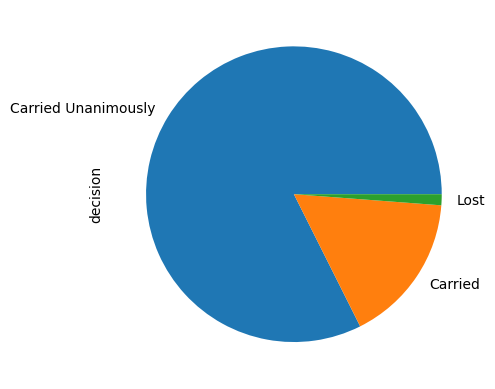

In [130]:
#[votes[col] = votes[' for col in ['meeting_type', 'vote', 'decision']]
votes = votes.astype({
    'meeting_type': 'category',
    'vote': 'category',
    'decision': 'category',
})
votes['vote_start_date_time'] = pd.to_datetime(votes.vote_start_date_time)
votes['vote_date'] = pd.to_datetime(votes.vote_date)
votes.decision.value_counts().plot(kind='pie')

## TimeSeries

We've already talked a bit about time and date handling, but the author of pandas wrote it to deal with time series data so it really excels here. The main objects to be aware of are

  * **Time Stamps**: Specific points in time usually recorded to the second or nanosecond
  * **Time Intervals/Time Deltas**: These types lets you do arithmetic on time objects

and there associated indices. We need some dates to play with. There's a convenience function called `to_datetime` which can convert many "human readable" dates to a pd.Timestamp object

In [131]:
from datetime import datetime

moonwalk = pd.to_datetime('July 20, 1969, 20:17 UTC')
moonwalk

Timestamp('1969-07-20 20:17:00+0000', tz='UTC')

Timestamps have attributes which let you extract days, year, etc. Normally these will be reported as numbers, but the strftime method supports the usual format specifiers (The correspond with the libc specifiers, here's a reference http://strftime.org/)

In [132]:
moonwalk.year

1969

In [134]:
print(f"The moon walk took place on a {moonwalk.strftime('%A')}")

The moon walk took place on a Sunday


In [135]:
pd.to_datetime(datetime.utcnow(), utc=True)

Timestamp('2023-07-11 17:28:45.947952+0000', tz='UTC')

Let's look at another sample dataset. This time, it is a record of historical flight data. It contains various columns, we will look at

  * `activity_period`: The date for the record in the format yyyymm
  * `passenger_count`
  
We can parse the date into a DateTime with `pd.to_datetime` then set the result as the index. We can then slice dates and resample

In [136]:
r = requests.get('https://data.sfgov.org/resource/rkru-6vcg?$limit=10000')

flightsDF = pd.DataFrame(r.json())
flightsDF.head()

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count
0,202212,SkyWest Airlines,OO,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 2,D,55553
1,202212,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Deplaned,Other,International,A,10909
2,202212,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,134756
3,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,1679
4,202212,Emirates,EK,Emirates,EK,International,Middle East,Deplaned,Other,International,A,13131


In [140]:
flightsDF['passenger_count'] = flightsDF['passenger_count'].astype(int)
flightsDF['date'] = pd.to_datetime(flightsDF['activity_period'], format='%Y%m')

flightsDF.set_index('date', inplace=True)
flightsDF.head()

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count
date,,,,,,,,,,,,
2022-12-01,202212,SkyWest Airlines,OO,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 2,D,55553
2022-12-01,202212,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Deplaned,Other,International,A,10909
2022-12-01,202212,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,134756
2022-12-01,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,1679
2022-12-01,202212,Emirates,EK,Emirates,EK,International,Middle East,Deplaned,Other,International,A,13131


In [142]:
monthlyFlightsDF = flightsDF[['passenger_count']].resample('M').sum()
monthlyFlightsDF.head()

,passenger_count
date,
2019-04-30,3299034
2019-05-31,10016002
2019-06-30,10933376
2019-07-31,11224624
2019-08-31,11484874


<Axes: xlabel='date'>

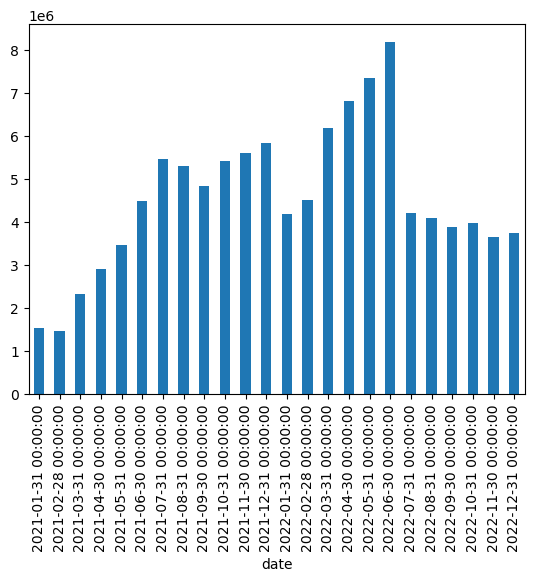

In [144]:
monthlyFlightsDF.loc['2021-01-01':, 'passenger_count'].plot(kind='bar')

Timestamp objects can also deal with arithmetic

In [146]:
flightsDF.index[-1] - flightsDF.index[0]

Timedelta('-1340 days +00:00:00')

<Axes: xlabel='date'>

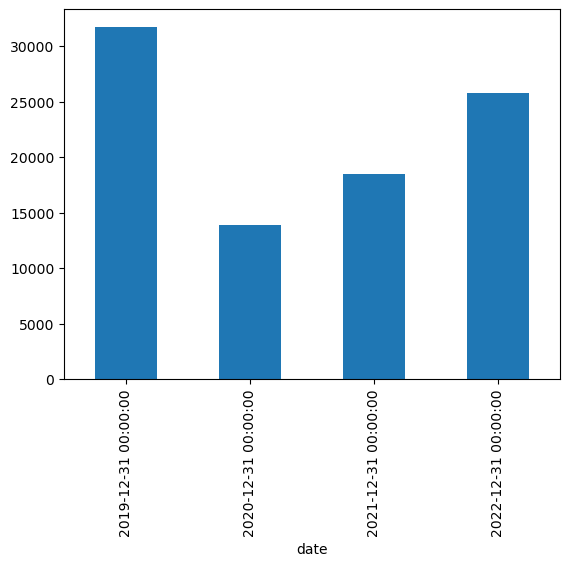

In [147]:
flightsDF['passenger_count'].resample('Y').mean().plot(kind='bar')

Again, the `value_counts` method can be very useful to get an idea of how categorical values are distributed...

In [148]:
flightsDF['geo_region'].value_counts()

US                     3108
Europe                 2035
Asia                   1987
Canada                  803
Mexico                  750
Australia / Oceania     562
Middle East             405
Central America         350
Name: geo_region, dtype: int64

For many of the algorithms in scikit learn, we need to convert categorical variables into numerical values. The simplest case is [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) which Pandas can do this for us with the `.get_dummies` method (sklearn also has it's own methods, but it's handy to be able to do this in general).

In [149]:
airlines_one_hot = pd.get_dummies(flightsDF['operating_airline_iata_code'])
flightsDF = flightsDF.drop([
    'operating_airline_iata_code',
    'operating_airline',
    'published_airline',
    'published_airline_iata_code',
], axis = 1
                          )
flightsDF.join(airlines_one_hot).head()

,activity_period,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,4O,AA,...,SY,TA,TK,TP,TS,UA,VN,VS,WN,WS
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,201904,Domestic,US,Enplaned,Other,Terminal 2,D,15374,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-01,201904,Domestic,US,Enplaned,Other,Terminal 2,D,15374,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-01,201904,Domestic,US,Enplaned,Other,Terminal 2,D,15374,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-01,201904,Domestic,US,Enplaned,Other,Terminal 2,D,15374,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-01,201904,Domestic,US,Enplaned,Other,Terminal 2,D,15374,0,0,...,0,0,0,0,0,0,0,0,0,0


_**Exercise**: Try resampling to find the total passenger count each quarter_

In [150]:
monthlyFlightsDF = flightsDF[['passenger_count']].resample('3M').sum()
monthlyFlightsDF.head()

,passenger_count
date,
2019-04-30,3299034
2019-07-31,32174002
2019-10-31,30076808
2020-01-31,26666412
2020-04-30,11533014


## Grouping, Joining, Concatenating

When working with a new dataset, I recommend trying to stuff as much as you can into a single `DataFrame` to try to help find the basic patterns, but sooner or later you will want to do aggregate operations within a `DataFrame` (e.g. group together all of the rows by year and show the mean value of some other column) or combine two or more `DataFrame`s. 

This data set has some old information about car engine efficency

In [151]:
carsDF = pd.read_csv(
    'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
)
carsDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [152]:
carsDF.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

### Groupby
Let's group things by `number_of_cylinders` and see how that affects mpg...

In [153]:
carsDF['mpg'].mean()

23.514572864321607

Calling `groupby` on it's own will give you a `DataFrameGroupBy` object. Informally you can think of this as an iterator for "sub"-`Dataframe`s or slices of your original `DataFrame`. You're expected to perform aggregate operations (e.g. `sum`, `mean` or generic `.apply` methods) on these groups to actually see some results.

In [154]:
carsDFbyCylinders = carsDF.groupby('cylinders')
carsDFbyCylinders

In [155]:
carsDFbyCylinders.describe()

mpg                                                        \
           count       mean       std   min    25%    50%    75%   max   
cylinders                                                                
3            4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7   
4          204.0  29.286765  5.710156  18.0  25.00  28.25  33.00  46.6   
5            3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4   
6           84.0  19.985714  3.807322  15.0  18.00  19.00  21.00  38.0   
8          103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6   

          displacement              ... acceleration       model_year  \
                 count        mean  ...          75%   max      count   
cylinders                           ...                                 
3                  4.0   72.500000  ...         13.5  13.5        4.0   
4                204.0  109.796569  ...         18.0  24.8      204.0   
5                  3.0  145.000000  ...         20.0  20.1        3.0   
6                 84.0  218.142857  ...         17.6  21.0       84.0   
8                103.0  345.009709  ...         14.0  22.2      103.0   

                                                                
                mean       std   min    25%   50%    75%   max  
cylinders                                                       
3          75.500000  3.696846  72.0  72.75  75.0  77.75  80.0  
4          77.073529  3.753420  70.0  74.00  78.0  80.00  82.0  
5          79.000000  1.000000  78.0  78.50  79.0  79.50  80.0  
6          75.928571  3.251638  70.0  74.00  76.0  78.00  82.0  
8          73.902913  3.021214  70.0  72.00  73.0  76.00  81.0  

[5 rows x 48 columns]

The typical aggregate operations are things like

  * mean()
  * sum()
  * median()
  * min()/max()
  * count()
  * nunique()
  * size()

In [158]:
carsDFbyCylinders.mean(numeric_only=True)

,mpg,displacement,horsepower,weight,acceleration,model_year
cylinders,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000
4,29.286765,109.796569,78.281407,2308.127451,16.601471,77.073529
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000
6,19.985714,218.142857,101.506024,3198.226190,16.263095,75.928571
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913


The `agg` method lets you apply arbitrary aggregate functions as well, e.g.

In [160]:
carsDFbyCylinders['mpg'].agg(np.std)

cylinders
3    2.564501
4    5.710156
5    8.228204
6    3.807322
8    2.836284
Name: mpg, dtype: float64

_**Exercise**: Try grouping my model year and looking at the median value for each group_

The object returned by `groupby` is an iterator, so...

In [161]:
for vroom, group in carsDFbyCylinders:
    print(f"There are {group.shape[0]} cars with {vroom} cylinders")

There are 4 cars with 3 cylinders
There are 204 cars with 4 cylinders
There are 3 cars with 5 cylinders
There are 84 cars with 6 cylinders
There are 103 cars with 8 cylinders


How are there possibly 4 cars with 3 cylinders?!

In [163]:
carsDFbyCylinders.get_group(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


We can also apply multiple operations at the same time. The `.agg()` method can take a list of the operations you want to perform (e.g. ["max", "min"])

In [164]:
carsDFbyCylinders['mpg'].agg(["min","max","mean"])

,min,max,mean
cylinders,,,
3,18.0,23.7,20.550000
4,18.0,46.6,29.286765
5,20.3,36.4,27.366667
6,15.0,38.0,19.985714
8,9.0,26.6,14.963107


We can filter based on our groups. This isn't the recommended way of doing the following, but let's manually group the cars by cylinder count, then find any particular cars that are more than 1.5 times the mean mpg of their group.

In [166]:
carsDF[
    carsDFbyCylinders.apply(lambda x: x.mpg > 1.5 * x.mpg.mean()).reset_index(level=0).mpg
]


/tmp/ipykernel_164/3590171030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  carsDF[


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
298,23.0,8,350.0,125.0,3900,17.4,79,usa,cadillac eldorado
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


There's actually a transform method lets you perform a group operation then use the results to update the rows. For example, we could calculate mean values for our groups, then look at how individual cars perform relative to that

In [168]:
means = carsDFbyCylinders.mpg.transform('mean')
carsDF[carsDF.mpg > 1.5 * means]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
298,23.0,8,350.0,125.0,3900,17.4,79,usa,cadillac eldorado
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


We could also look at the best and worst performing car relative to the group means, `idxmin` and `idxmax` are to pandas what `argmin` and `argmax` are to numpy (see also `nlargest`).

In [169]:
carsDF['mpg_mean'] = carsDF['mpg'] - means
carsDF.loc[carsDF.groupby('cylinders')['mpg_mean'].idxmax()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_mean
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,3.150000
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,17.313235
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel),9.033333
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel),18.014286
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls,11.636893


In [170]:
carsDF.loc[carsDF.groupby('cylinders')['mpg_mean'].idxmin()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_mean
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3,-2.550000
76,18.0,4,121.0,112.0,2933,14.5,72,europe,volvo 145e (sw),-11.286765
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000,-7.066667
128,15.0,6,250.0,100.0,3336,17.0,74,usa,chevrolet nova,-4.985714
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d,-5.963107


You can also group by multiple conditions, but you'll get a hierarchical index as the result

In [171]:
carsDF.groupby(['origin', 'cylinders']).mean(numeric_only=True)

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year      mpg_mean  
origin cylinders                                          
europe 4             16.722222   75.507937 -8.756536e-01  
       5             18.633333   79.000000  2.368476e-15  
       6             16.425000   78.250000  1.142857e-01  
japan  3             13.250000   75.500000 -8.881784e-16  
       4             16.569565   77.507246  2.308887e+00  
       6             13.550000   78.000000  3.897619e+00  
usa    4             16.526389   78.027778 -1.446487e+00  
       6             16.474324   75.635135 -3.222008e-01  
       8             12.955340   73.902913 -1.034771e-15

We won't cover Hierarchical indices, so for now we will just flatten the result by resetting the index

In [ ]:
carsDF.groupby(['origin', 'cylinders'])['mpg'].mean().reset_index()

N.B. `.transform` and `.apply` exist as methods of both ordinary DataFrames and `DataFrameGroupBy` objects, depending on what you want to do.

## Concatenate & Join

There are a handful of functions which handle concatenation. The main ones are `pd.concat`, `pd.join` and `pd.merge` and there is some overlap in exactly what they do so. You can combine either `Series` and `DataFrames` but we'll jump straight to `DataFrames`,

In [173]:
s1 = pd.DataFrame(
    {
        'upper': ['A', 'B', 'C'], 
        'lower': ['a', 'b', 'c']
    }, 
    columns=['upper', 'lower'], 
    index=[1,2,3]
)

s2 = pd.DataFrame(
    {
        'upper': ['D', 'E', 'F'],
        'lower': ['d', 'e', 'f']
    }, 
    columns=['upper', 'lower'],
    index=[1, 2, 3]
)
s2

,upper,lower
1,D,d
2,E,e
3,F,f


`pd.join` will combine by aligning on the index, but expects unique column names, we can use the suffix keyword to make our columns unique

In [174]:
s1.join(s2, lsuffix='_l', rsuffix='_r')

,upper_l,lower_l,upper_r,lower_r
1,A,a,D,d
2,B,b,E,e
3,C,c,F,f


With concat we can combine rows (we'll reindex to get unique index values in the result)

In [177]:
pd.concat([s1,s2]).reset_index()

,index,upper,lower
0,1,A,a
1,2,B,b
2,3,C,c
3,1,D,d
4,2,E,e
5,3,F,f


Notice that we enclosed the things we want to join as some sort of iterable (a `list` here).

`concat` can also combine columns

In [178]:
pd.concat([s1, s2], axis='columns')

,upper,lower,upper,lower
1,A,a,D,d
2,B,b,E,e
3,C,c,F,f


`pd.concat` will accept duplicate indices, but normally that indicates a problem with the data normalization. `concat` has a `verify_index` argument which can check for these problems and you can specify what you want to do with duplicates manually.

concat will often result in `NaN`s because some columns might not exist in both/all frames.

In [179]:
d4 = pd.DataFrame({'fruit': ['apple', 'orange'], 'veg': ['brocolli', 'carrot'], 'tree': ['cedar', 'alder']})
d5 = pd.DataFrame({'veg': ['onion', 'potato'], 'fruit': ['banana','grape']})
pd.concat([d4,d5], sort=False, ignore_index=True)

,fruit,veg,tree
0,apple,brocolli,cedar
1,orange,carrot,alder
2,banana,onion,NaN
3,grape,potato,NaN


Since the index wasn't important here, I threw it away and just accepted a new one.

In the general case joining DataFrames can get complex. The concat method can take a `join` keyword to specify a database like join stragegy (inner or outer), but `pd.merge` is a bit more flexible. It implements the usual relations

  * one-to-one (similar to a concat)
  * many-to-one
  * many-to-many

and lets us join based on column value(s). Here is an example of a many-to-one merge

In [181]:
adf1=pd.DataFrame({
    'class': ['insect', 'spider'], 
    'legs': [6, 8]}
)

adf2=pd.DataFrame({
    'name': ['molly', 'anna', 'stephen', 'mica'], 
    'class': ['insect','insect','spider','insect']}
)                     

print(adf1); print(adf2)

    class  legs
0  insect     6
1  spider     8
      name   class
0    molly  insect
1     anna  insect
2  stephen  spider
3     mica  insect


In [182]:
pd.merge(adf1, adf2)

,class,legs,name
0,insect,6,molly
1,insect,6,anna
2,insect,6,mica
3,spider,8,stephen


The _many-to-one_ is many different rows in adf2 being mapped to a single row in adf1 (insects). `pd.merge` also accepts a selection of keyword arguments so you can manually specify which columns to join, patch up name differences etc.

## Extra

Here is a dataset on UFO observations for the US and Canada, read it in and try to extract the following information

* _How many from each country?_
* _States with the most observations_
* _What is the most common shape observed in each country/state?_
* _Find the most recent report from each province in canada_
* _Look at the number of observations in California by month_
* _For each state find the ufo hotspot with a `.pivot table`_
  * _Since _lat_ and _lng_ are just coordinates, try plotting the hot spots_

In [209]:
ufoDF = pd.read_csv(
    'https://m2pi.syzygy.ca/data/UFOs_coord.csv', 
    names = ['Date', 'Country', 'City', 'State', 'Shape', 'Summary', 'lat', 'lng'],
    skiprows=[0],
    encoding='latin1'
)
ufoDF['Date'] = pd.to_datetime(ufoDF.Date.str.replace('.', ':', regex=False))
ufoDF.head()

,Date,Country,City,State,Shape,Summary,lat,lng
0,2016-12-21 19:15:00,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,2016-12-21 00:00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,2016-12-20 22:30:00,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,2016-12-20 19:00:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,2016-12-19 21:53:00,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


How many from each country?

In [211]:
ufoDF.groupby('Country').size()

Country
CANADA     150
USA       5027
dtype: int64

States with the most observations?

In [212]:
ufoDF.groupby('State').Shape.count().sort_values(ascending=False)

State
CA    546
FL    338
AZ    220
WA    215
NC    211
NY    203
CO    192
PA    189
OR    157
IL    142
OH    141
TX    139
MI    131
NJ    125
GA    117
WI    114
MO    109
TN    108
VA    108
MA    105
MD     98
SC     88
UT     84
MN     77
IN     77
NM     73
ID     69
ME     67
CT     65
ON     62
NV     61
KY     51
NH     50
KS     47
LA     46
AL     46
MT     45
OK     43
AR     40
IA     40
AK     37
MS     31
RI     29
WV     28
HI     28
BC     27
AB     25
SD     20
VT     19
DE     16
NE     16
WY     15
ND     11
SK     10
QC      9
MB      7
NB      4
NS      4
YT      2
Name: Shape, dtype: int64

What is the most common shape observed in each country/state?

In [213]:
for area, group in ufoDF.groupby('Country'):
    shape_counts = group.groupby('Shape').size()
    print(f"{area}: {shape_counts.idxmax(), shape_counts.max()}")

CANADA: ('Light', 46)
USA: ('Light', 1072)


_Find the most recent report from each province in canada_

In [215]:
ufoDF.loc[ufoDF[ufoDF['Country'] == 'CANADA'].groupby('State').Date.idxmax()]

,Date,Country,City,State,Shape,Summary,lat,lng
14,2016-12-18 22:00:00,CANADA,Wetaskiwin,AB,Light,Bright Red Light Seen by Roommate and Myself i...,52.968492,-113.367920
278,2016-11-21 23:15:00,CANADA,Victoria,BC,Other,A moving glow from something above a cloud ove...,48.428333,-123.364927
1466,2016-10-09 22:00:00,CANADA,Selkirk,MB,Light,8-10 red orbs crossing the sky,50.145621,-96.878800
3887,2016-07-04 21:00:00,CANADA,Fredericton,NB,Unknown,Low flying object with red and green lights - ...,45.964649,-66.643753
103,2016-09-12 05:25:00,CANADA,Truro,NS,Oval,Oval/ 1st was oval yellowsish red white glowin...,45.366668,-63.300006
1971,2016-12-08 08:10:00,CANADA,Oakville,ON,Light,Object in morning sky gets white bright and di...,43.447436,-79.666672
3483,2016-11-05 21:05:00,CANADA,Gatineau,QC,Light,"Two separate lights touching each other, then ...",45.456305,-75.722883
375,2016-11-15 18:00:00,CANADA,Prince Albert,SK,Triangle,A bright halogen like light listed lazily in a...,53.201097,-105.748901
1813,2016-08-22 00:00:00,CANADA,Whitehorse,YT,Other,((HOAX??)) Cool scary and weird.,60.721571,-135.054932


_Look at the number of observations in California by month_

In [216]:
ufoDF['Month'] = ufoDF.Date.dt.month

In [217]:
byMonth = ufoDF.groupby(['Country', 'State', 'Month']).size().reset_index().sort_values('Month')

<Axes: ylabel='Month'>

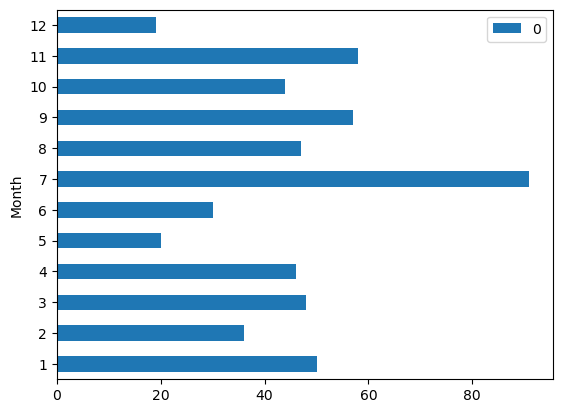

In [218]:
ca = byMonth[(byMonth['Country'] == 'USA') & (byMonth['State'] == 'CA')].set_index('Month')
ca.plot(kind='barh')

* _For each state find the ufo hotspot with a `.pivot table`_
  * _Since _lat_ and _lng_ are just coordinates, try plotting the hot spots_

<Axes: xlabel='lng', ylabel='lat'>

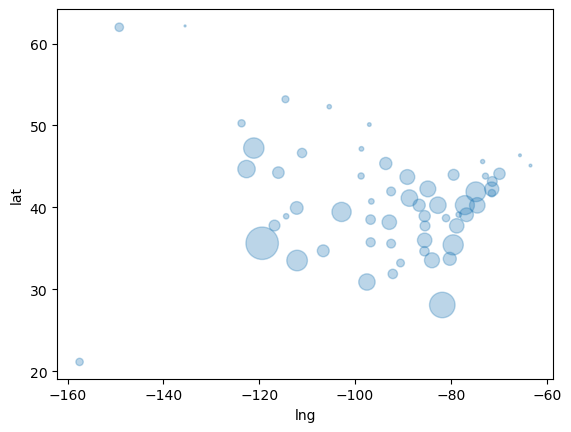

In [208]:
ufoDF.pivot_table(index=['State'], values=['lat', 'lng']).plot(
    kind='scatter', x='lng', y='lat', s = ufoDF.groupby('State').size(), alpha=0.3
)

## Other bits and pieces...

* pd.cut: Binning data

In [ ]:
g = np.random.default_rng(42)
age = g.integers(15, 70, size=15)
bins = [10, 19, 20, 29, 30, 45, 55, 70]
age_groups = pd.cut(age, bins)
type(age_groups)